In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
year = []

for i in range(7) :
    year.append(str(2014 + i))
year

['2014', '2015', '2016', '2017', '2018', '2019', '2020']

In [3]:
data= pd.read_excel('Data/총 인구 및 인구 이동 통계/2014인구.xls')
data1 = pd.read_csv('Data/총 인구 및 인구 이동 통계/2014연령별인구현황.csv', encoding='cp949')

In [4]:
def make_data(data) :
    transfer_in = []
    transfer_out = []
    
    data = data.drop(0)
    data = data.drop('기간', axis = 1)
    data= data[data['동'] == '소계']
    data = data.loc[:, ['자치구', '총전입(⑦=①+③+⑤)', '총전출(⑧=②+④+⑥)']]
    data.columns = ['자치구', '총전입', '총전출']
    
    for value in data['총전입'].values :
        transfer_in.append(value)
    for value in data['총전출'].values :
        transfer_out.append(value)
    return data, transfer_in, transfer_out

In [5]:
data

,기간,자치구,동,총전입(⑦=①+③+⑤),총전출(⑧=②+④+⑥),구내이동,구내이동.1,구간이동,구간이동.1,시ㆍ도간이동,시ㆍ도간이동.1
0,기간,자치구,동,총전입(⑦=①+③+⑤),총전출(⑧=②+④+⑥),전입(①),전출(②),전입(③),전출(④),전입(⑤),전출(⑥)
1,2014,합계,합계,1573594,1661425,495401,495401,602622,602622,475571,563402
2,2014,종로구,소계,24191,27484,4507,4507,11243,14657,8441,8320
3,2014,종로구,사직동,1694,1840,377,360,833,1003,484,477
4,2014,종로구,삼청동,339,498,64,126,151,228,124,144
...,...,...,...,...,...,...,...,...,...,...,...
445,2014,강동구,둔촌1동,2636,3072,731,774,1185,1312,720,986
446,2014,강동구,둔촌2동,3767,4114,1483,1379,1097,1136,1187,1599
447,2014,강동구,암사1동,5528,6396,2667,2714,1363,1493,1498,2189
448,2014,강동구,천호2동,5169,6182,2194,2363,1459,1618,1516,2201


In [6]:
data1 = pd.read_csv('Data/총 인구 및 인구 이동 통계/2014연령별인구현황.csv', encoding='cp949')

In [7]:
def make_data1(data1, year) :
    data1 = data1.loc[:, ['행정구역', year + '년_계_총인구수']]
    data1.columns = ['자치구', '총인구수']
    data1 = data1.drop(0)
    value =[]
    value.append(data1['총인구수'].values)
    value_string_to_int(value)
    return data1, value

In [8]:
def value_string_to_int(value) :
    for i in range(len(value)) :
        for j in range(25) :
            value[i][j] = int(value[i][j].replace(',', ''))
    return value

In [9]:
color = []
for i in range(24) :
    color.append('grey')
color.append('dodgerblue')

In [30]:
def draw_graph(year) :
    x = np.arange(25)
    plt.rc('font', family='AppleGothic')
    file_name = '{} 총 인구 수 및 전입 전출 인구'.format(year)
    plt.bar(x, value[0], color = color, label = '인구 수')
    plt.plot(x, transfer_out, 'r', label = '총 전출')
    plt.plot(x, transfer_in, 'orange', label = '총 전입')
    plt.title(file_name)
    plt.xlabel('자치구')
    plt.ylabel('인구 수')
    plt.legend()
    plt.xticks(x, borough, rotation = 90)
    plt.tight_layout()
    plt.savefig(file_name + '.png')
    plt.show()

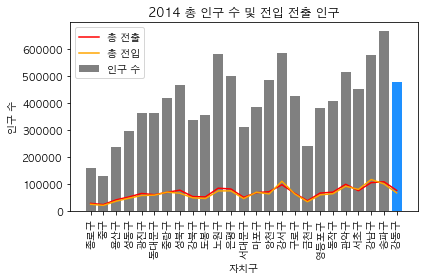

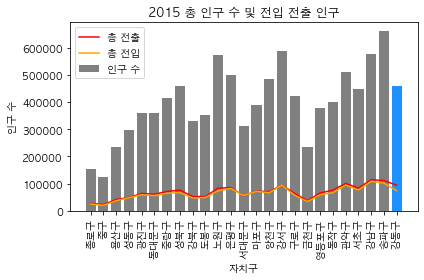

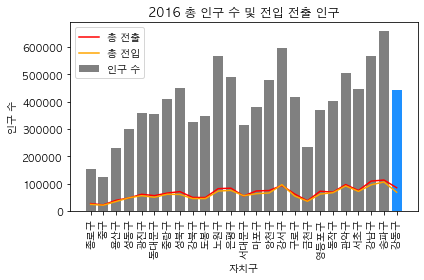

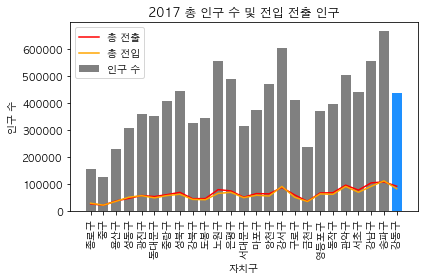

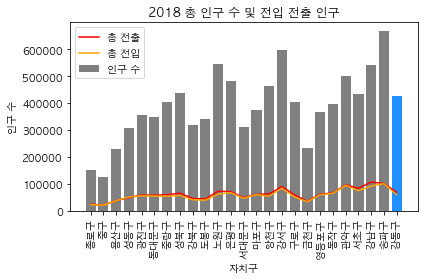

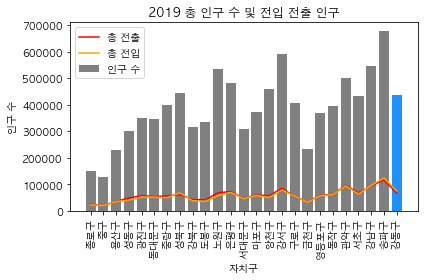

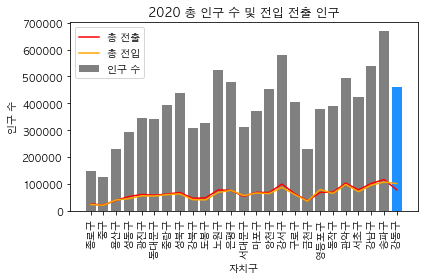

In [31]:
transfer_in = []
transfer_out = []
borough = ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구','노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구','강동구']
for i in range(7) :
    data = pd.read_excel('Data/총 인구 및 인구 이동 통계/' + year[i] + '인구.xls')
    data,transfer_in,transfer_out = make_data(data)
    data1 = pd.read_csv('Data/총 인구 및 인구 이동 통계/' + year[i] + '연령별인구현황.csv', encoding='cp949')
    data1,value = make_data1(data1, year[i])
    draw_graph(year[i])

In [ ]:
year